In [2]:
import pickle
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline

## Load Unique Data

In [3]:
files = ["scidir_metadata_2000.p", "scidir_metadata_2000.p", "scidir_metadata_4950.p"]

rest = []
final = pickle.load(open("scidir_metadata/" + files[0], "rb"))[1]

for file in files[1:]:
    rest.extend(pickle.load(open("scidir_metadata/" + file, "rb"))[1])
    
print(len(final), len(rest))

1956 6904


In [4]:
prev_len_final = len(final) - 1

while prev_len_final != len(final):
    final_ids = [x.id for x in final]
    for each in rest:
        if each.id not in final_ids:
            final.append(each)
    prev_len_final = len(final)
    print(len(final))

4952


## Extracting Useful Data

In [5]:
data = [x.data["coredata"] for x in final]
temp = data[62]
temp.keys()
# print(temp["prism:issueName"])
# print(temp["prism:aggregationType"])

dict_keys(['pii', 'eid', 'pubType', 'prism:copyright', 'prism:pageRange', 'dc:title', 'prism:issn', 'dc:description', 'link', 'prism:publisher', 'dc:identifier', 'dc:format', 'openArchiveArticle', 'openaccess', 'prism:startingPage', 'prism:url', 'openaccessUserLicense', 'openaccessArticle', 'prism:coverDate', 'prism:doi', 'openaccessType', 'openaccessSponsorName', 'dcterms:subject', 'prism:aggregationType', 'openaccessSponsorType', 'prism:volume', 'prism:publicationName', 'prism:coverDisplayDate', 'prism:endingPage'])

### Testing cell
keep_list = ['pubType', 'dc:title', 'dc:description', 'prism:publisher', 'openaccess', 'dc:creator',
             'prism:coverDate', 'prism:issueName', 'prism:doi', 'openaccessType', 'openaccessSponsorName',
             'prism:aggregationType', 'openaccessSponsorType', 'prism:publicationName']

```
temp.keys()
for key in temp.keys():
    if key in keep_list:
        print(key, temp[key])
        break
```

In [6]:
articles = list()

for dat in data:
    try:
        article_dict = dict()
    #     article_dict["pub_type"] = dat["pubType"]
        article_dict["title"] = dat["dc:title"]
        article_dict["abstract"] = dat["dc:description"]
#         article_dict["publisher"] = dat["prism:publisher"]
#         article_dict["authors"] = [author["$"] for author in dat["dc:creator"]]
        article_dict["cover_date"] = dat["prism:coverDate"]
    #     article_dict["issue_name"] = dat["prism:issueName"]
        article_dict["doi"] = dat["prism:doi"]
        article_dict["open_access"] = dat["openaccess"]
        article_dict["open_access_type"] = dat["openaccessType"]
        article_dict["open_access_sponsor_name"] = dat["openaccessSponsorName"]
        article_dict["type"] = dat["prism:aggregationType"]
        article_dict["open_access_sponsor_type"] = dat["openaccessSponsorType"]
        article_dict["publication_name"] = dat["prism:publicationName"]
    except KeyError as key:
        print(key)
    
    articles.append(article_dict)

## Analysis

In [7]:
df = pd.DataFrame(articles)

In [8]:
df.columns

Index(['abstract', 'cover_date', 'doi', 'open_access',
       'open_access_sponsor_name', 'open_access_sponsor_type',
       'open_access_type', 'publication_name', 'title', 'type'],
      dtype='object')

In [9]:
abstracts = " ".join([abstract for abstract in list(df.abstract) if abstract is not None])

In [10]:
print(len(abstracts))

4714622


In [11]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
temp = word_tokenize(abstracts)
word_tokens = []

for tem in temp:
    if len(tem) > 2:
        word_tokens.append(lemmatizer.lemmatize(tem.lower()))


In [13]:
words_to_ignore = "wa,used,using,paper,based,study,approach,ha,method,result,problem,proposed,abstract,performance,technique,process,different,two,new,research,parameter,application,also,time,set,use,one,developed,design,show,value,information,knowledge,model,system,present,compared,solution,experimental,obtained"

stop_words = stopwords.words("english")
stop_words += words_to_ignore.split(",")

words = [w for w in word_tokens if not w in stop_words]

In [15]:
freq = nltk.FreqDist(words)

freq.most_common(20)

[('artificial', 3991),
 ('network', 3838),
 ('algorithm', 3188),
 ('neural', 2920),
 ('data', 2896),
 ('intelligence', 2632),
 ('ann', 2161),
 ('analysis', 1355),
 ('prediction', 1129),
 ('optimization', 1100),
 ('control', 1038),
 ('learning', 933),
 ('function', 868),
 ('input', 865),
 ('accuracy', 857),
 ('test', 793),
 ('training', 792),
 ('number', 780),
 ('work', 770),
 ('tool', 756)]

In [16]:
for i, date in enumerate(df.cover_date):
    df.cover_date[i] = int(date[:4])
#     years.append(year)
df.cover_date

0       2018
1       2017
2       2017
3       2017
4       2017
5       2017
6       2017
7       2017
8       2017
9       2017
10      2017
11      2018
12      2017
13      2017
14      2017
15      2017
16      2018
17      2017
18      2017
19      2017
20      2018
21      2017
22      2017
23      2017
24      2017
25      2017
26      2017
27      2017
28      2017
29      2017
        ... 
4922    2008
4923    2013
4924    2008
4925    2008
4926    2008
4927    2018
4928    2012
4929    2012
4930    2008
4931    2013
4932    2013
4933    1992
4934    1996
4935    2012
4936    2009
4937    2007
4938    2008
4939    1996
4940    2012
4941    2009
4942    1998
4943    1990
4944    1991
4945    2013
4946    2013
4947    2013
4948    1997
4949    1994
4950    2008
4951    2013
Name: cover_date, Length: 4952, dtype: object

In [17]:
def process_abstracts(temp_df):
    abstracts = " ".join([abstract for abstract in list(temp_df.abstract) if abstract is not None])
    temp = word_tokenize(abstracts)
    word_tokens = []

    for tem in temp:
        if len(tem) > 2:
            word_tokens.append(lemmatizer.lemmatize(tem.lower()))
    
    words_to_ignore = "wa,used,using,paper,based,study,approach,ha,method,result,problem,proposed,abstract,performance,technique,process,different,two,new,research,parameter,application,also,time,set,use,one,developed,design,show,value,information,knowledge,model,system,present,compared,solution,experimental,obtained"

    stop_words = stopwords.words("english")
    stop_words += words_to_ignore.split(",")

    words = [w for w in word_tokens if not w in stop_words]
    
    return words

In [18]:
def word_frequency(df, word):
    year = 1961
    x = []
    y = []

    while year <= 2018:
        temp_df = df[df.cover_date == year]
        words = process_abstracts(temp_df)
        freq = nltk.FreqDist(words)
        try:
            y.append(freq[word] / len(temp_df))
        except ZeroDivisionError:
            y.append(freq[word])
        x.append(year)
        year += 1
    
    return x, y

def open_access(df):
    year = 1961
    x = []
    y = []

    while year <= 2018:
        temp_df = df[df.cover_date == year]
        try:
            y.append(sum(temp_df.open_access.astype("int64")) / len(temp_df))
        except ZeroDivisionError:
            y.append(sum(temp_df.open_access.astype("int64")))
        x.append(year)
        year += 1
    
    return x, y

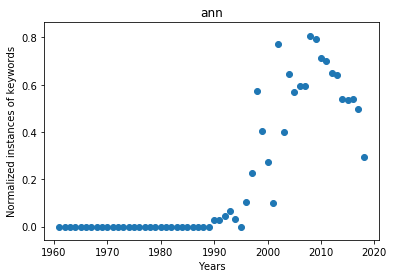

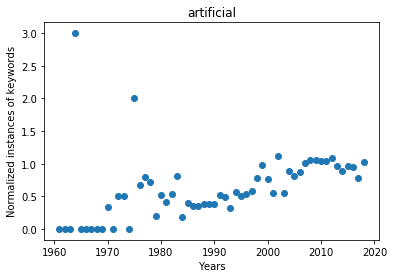

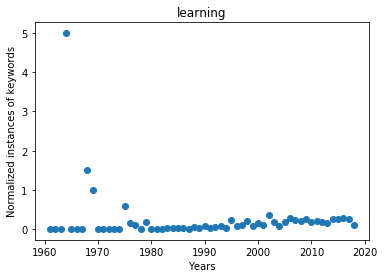

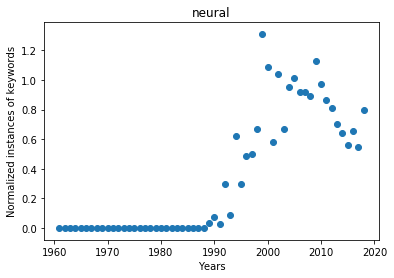

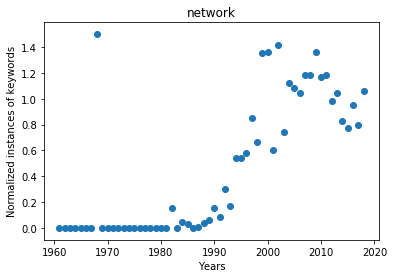

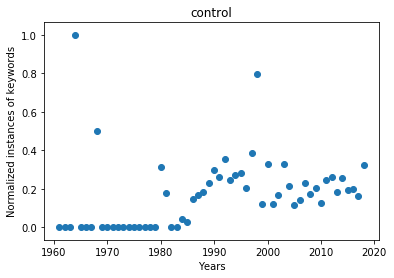

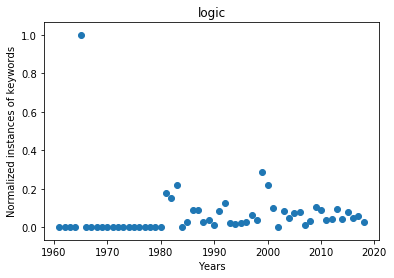

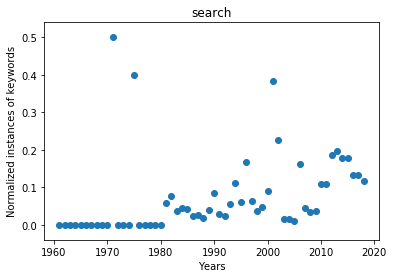

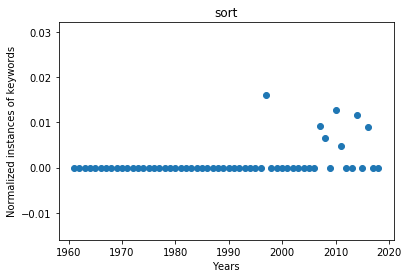

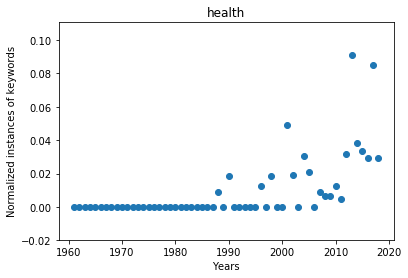

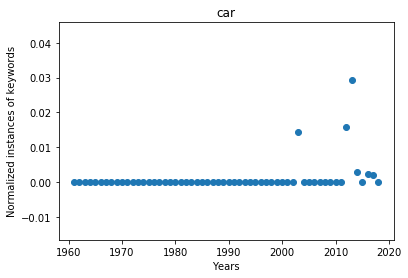

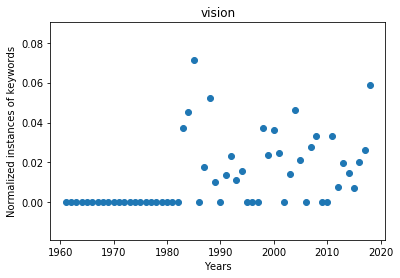

In [31]:
plot_list = "ann,artificial,learning,neural,network,control,logic,search,sort,health,car,vision"
for each in plot_list.split(","):
    x, y = word_frequency(df, each)
    plt.figure()
    plt.scatter(x, y)
    plt.title(each)
    plt.xlabel("Years")
    plt.ylabel("Normalized instances of keywords")
    plt.savefig("plots/" + each + ".png")
    plt.show()

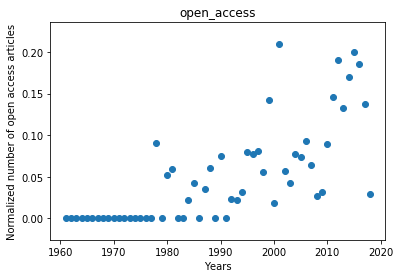

In [33]:
x, y = open_access(df)
plt.figure()
plt.scatter(x, y)
plt.title("open_access")
plt.xlabel("Years")
plt.ylabel("Normalized number of open access articles")
plt.savefig("plots/openaccess.png")
plt.show()

In [34]:
from collections import Counter as c
# sum(df.open_access.astype("int64"))
# len(df.open_access) - sum(df.open_access.astype("int64"))
a = c(df.open_access_sponsor_type)
print(a)

Counter({None: 4447, 'ElsevierWaived': 221, 'ElsevierBranded': 158, 'FundingBody': 96, 'Author': 26, 'FundingPartnerOpenArchive': 3, 'Other': 1})


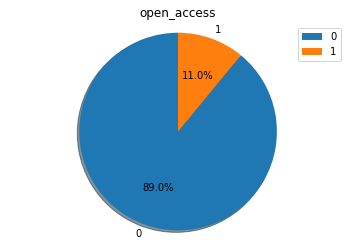

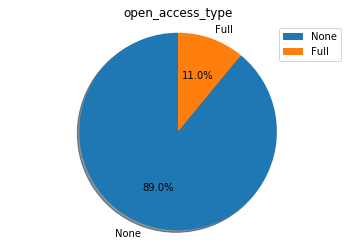

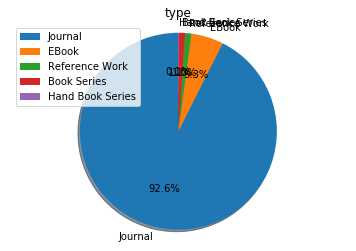

In [35]:
from collections import Counter as c

cols = "open_access,open_access_type,type"
for column in cols.split(","):
    labels = []
    sizes = []
    
    temp = c(df[column])
    
    for key in temp.keys():
        labels.append(key)
        sizes.append(temp[key])

    plt.figure()
    patches, texts, _ = plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(column)
    plt.savefig("plots/" + column + ".png")
    plt.show()

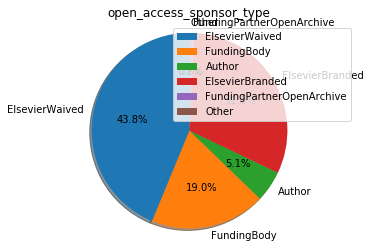

In [36]:
labels = []
sizes = []

temp = c(filter(None, list(df["open_access_sponsor_type"])))

for key in temp.keys():
    labels.append(key)
    sizes.append(temp[key])

plt.figure()
patches, texts, _ = plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.legend(patches, labels, loc=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("open_access_sponsor_type")
plt.savefig("plots/open_access_sponsor_type.png")
plt.show()